In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras as K
import xgboost as xg

import numpy as np
from numpy import random as rand
rand.seed(42)

# 1) Example de feature engineering

In [2]:
n_points = 1000000
angles = pd.Series(rand.uniform(0,2*np.pi,n_points),name="angle")
true_radius = pd.Series(rand.choice(range(0,10),n_points),name="true_radius")

data = pd.DataFrame(zip(angles,true_radius),columns=["angle","true_radius"])
data = data.assign(radius=lambda x: rand.normal(x.true_radius, 0.4))

data["target"] = data["true_radius"].map(lambda x: np.rint(x)%2)
data["x"] = data["radius"] * np.cos(data["angle"])
data["y"] = data["radius"] * np.sin(data["angle"])

/home/cbecot/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


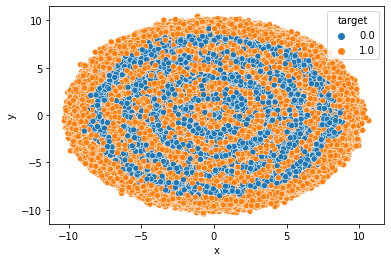

In [3]:
sns.scatterplot(x="x",y="y",data=data,hue="target")
plt.show()

<AxesSubplot:xlabel='x', ylabel='reco_radius'>

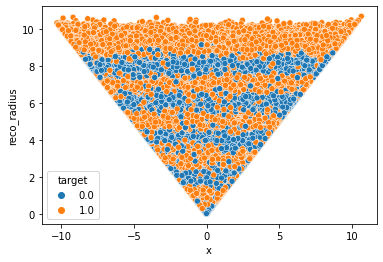

In [4]:
data["reco_radius"] = np.sqrt(data["x"]**2 + data["y"]**2)
sns.scatterplot(data=data,x="x",y="reco_radius",hue="target")

<AxesSubplot:xlabel='is_odd', ylabel='Count'>

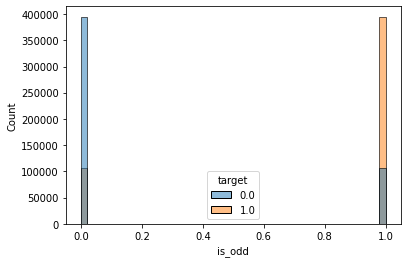

In [5]:
data['is_odd'] = data['reco_radius'].map(lambda x: np.rint(x)%2)
sns.histplot(data=data,x="is_odd",hue="target")

In [6]:
metrics.accuracy_score(data["target"],data['is_odd'])

0.788698

# 2) Example over-fitting

In [69]:
npoints=60
x = rand.normal(0,2,npoints)
y = 3*x+5*x**2-3*x**3+rand.normal(0,60,npoints)
y -= min(y)
y /= max(y)

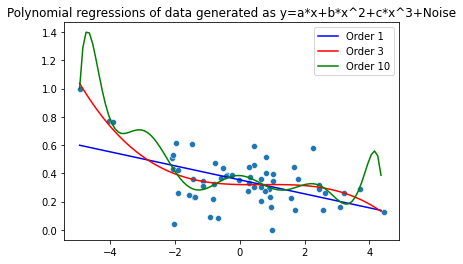

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def poly_reg(deg,x):
    poly_reg = PolynomialFeatures(degree=deg)
    X_poly = poly_reg.fit_transform(x.reshape(-1, 1))
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    return pol_reg,poly_reg

X_grid = np.arange(min(x), max(x), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1) 

orders={
    1:'blue',
    3:'red',
    10:'green',
}

for id,val in orders.items():
    pol,poly = poly_reg(id,x)
    plt.plot(X_grid, pol.predict(poly.fit_transform(X_grid)), color=val,label=f"Order {id}")

sns.scatterplot(x=x,y=y)
plt.title("Polynomial regressions of data generated as y=a*x+b*x^2+c*x^3+Noise")
plt.show()